We have decided to find the top factors that affect the performance of a stock,in particular the US stock market, so as to develop a safe stock investing strategy to ensure positive rates of return for investors while minimising loss.

- Improve on the EDA (draw some insights from the data) Link the EDA to ML

ML
- Join the datasets for 2014-2016 training &&
- 2017-2018 for testing
- Use the best model for coming up with our stategy


Propose 3 strategies and compare them
1) momentum. Invest in the stock with consistent class of 1 over the 5 years. / select stocks whose price var is positive for the previous few years. (One Stock)

2) momentum. Invest in the stock with consistent class of 1 over the 5 years. / select stocks whose price var is positive for the previous few years. (Multiple Stocks) (hypothesized that this will be the best model)

3) Invest in the stock with a class 1 in the previous year / Select stock whose price var is positive for the last year (one Stock)

4) Invest in the stock with a class 1 in the previous year / Select stock whose price var is positive for the last year (multiple Stocks)


- Check for effectiveness
for company with class of 1, sum up their prive var for the 4 years and invest in the top ?? company with the highest price  var

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('2018_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,2.636746e+09,103792000.0,-0.004,-0.02910,0.673,190855000.0,0.0000,0.0,-26.687113,0,Technology
1,5.361960e+09,853769000.0,0.073,-0.25870,-8.191,523610000.0,0.0000,0.0,-42.583392,0,Consumer Cyclical
2,1.798500e+09,412100000.0,-0.158,-0.07130,4.204,404200000.0,0.0085,13000000.0,66.143385,1,Basic Materials
3,5.816440e+08,479440000.0,0.284,0.17450,4.448,427656000.0,0.0000,29000.0,-9.197867,0,Energy
4,1.589000e+09,84532000.0,0.044,0.07485,9.939,303107000.0,0.0000,0.0,100.552499,1,Basic Materials
...,...,...,...,...,...,...,...,...,...,...,...
1726,6.966000e+06,3331000.0,0.305,0.06250,18.620,4573000.0,0.0193,0.0,11.671183,1,Financial Services
1727,2.307974e+07,6089738.0,0.080,0.06010,9.580,2302113.0,0.0000,0.0,-3.076927,0,Consumer Defensive
1728,3.546600e+07,5710000.0,0.031,0.01090,5.464,6593000.0,0.0000,0.0,27.118650,1,Consumer Cyclical
1729,0.000000e+00,2986000.0,0.044,0.35880,1.618,-816000.0,0.0000,38000.0,-22.159090,0,Healthcare


In [3]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield", "R&D Expenses"]])
X = predictors

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7295839753466872

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6997690531177829



<AxesSubplot:>

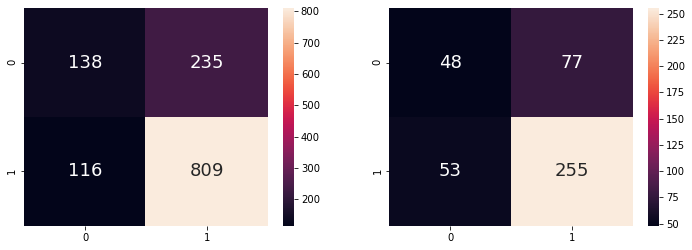

In [29]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 543.6, 'Book Value per Share <= 5.777\ngini = 0.41\nsamples = 1298\nvalue = [373, 925]\nclass = 1'),
 Text(167.4, 326.16, 'Dividend Yield <= 0.001\ngini = 0.5\nsamples = 322\nvalue = [159, 163]\nclass = 1'),
 Text(83.7, 108.72000000000003, 'gini = 0.496\nsamples = 254\nvalue = [138, 116]\nclass = 0'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.427\nsamples = 68\nvalue = [21, 47]\nclass = 1'),
 Text(502.20000000000005, 326.16, 'Profit Margin <= 0.044\ngini = 0.342\nsamples = 976\nvalue = [214, 762]\nclass = 1'),
 Text(418.5, 108.72000000000003, 'gini = 0.454\nsamples = 316\nvalue = [110, 206]\nclass = 1'),
 Text(585.9, 108.72000000000003, 'gini = 0.265\nsamples = 660\nvalue = [104, 556]\nclass = 1')]

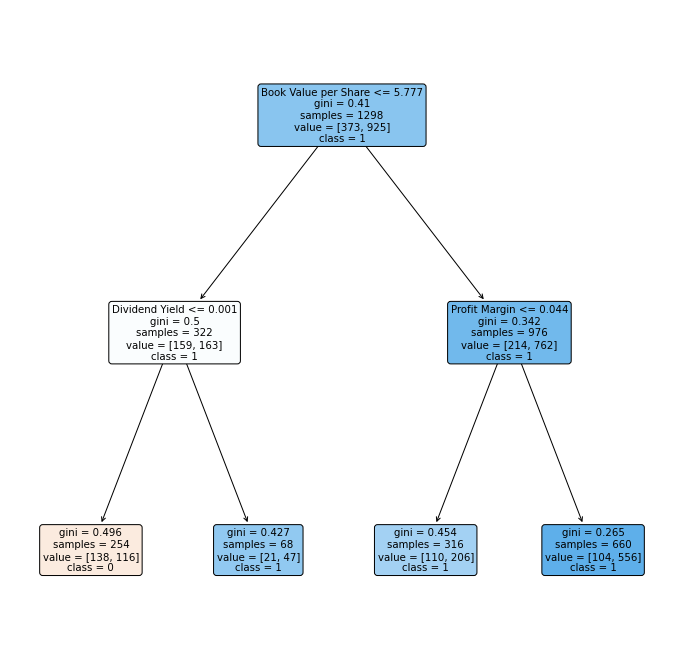

In [30]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])